## Part 2: Training Deep Learning Model
A simple neural network can be used or state-of-art methods like ***Convolutional Neural Network***. The dataset collected in <u>**Part 1** </u> should be split into:
1. Training set (80% of the samples) or can be further split into: <br>
    i. Train set - used to train the model <br>
    ii. Validation set - used to evaluate the model in order to find the best hyperparameters (e.g learning rate, batch size, number of epochs) and architecture (e.g how many hidden layers, how many neurons per layers, activation function). Alternatively, we can use K-fold cross-validation technique to give better hyperparameters. <br>
2. Test set (20% of the samples) - used to evaluate the model (**do not use this data for training or validation because it might result overfitting**). Report the model ***Mean Square Error (MSE)*** of the test set with trained model. After evaluating the model with test set, the hyperparameters and neural network architecture should not change.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Preprocessing the dataset
Often in machine learning, the dataset is firstly standardising by normalising using the following transformations:
\begin{equation*}
x := \frac{x-x_{min}}{x_{max}-x_{min}}
\end{equation*}

This can speed up the convergence rate on gradient descent during learning phase. Fortunately, the scikit-learn library had provide the standard scaler function for this transformation. **Note that normalized y label (Throughput) is not necessary since it does not affect the convex function of features**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the csv file of the scraped image urls
dataframe = pd.read_csv("dataset.csv", header=0)

# Shuffle the dataset and split into train and test set
X = dataframe[dataframe.columns[4:36]]
Y = dataframe[['Throughput']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardised the training and test set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)

X

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31
0,1,0,1,1,1,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
1,1,1,0,1,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,0,1,0,1
4,0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1,1,0,0,0,1,1,1,1,1,...,0,0,0,1,0,1,0,1,0,0
481,0,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
482,1,1,0,1,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
483,1,0,0,1,0,1,1,1,0,1,...,1,0,1,0,0,0,0,1,0,1


Text(0, 0.5, 'Frequency')

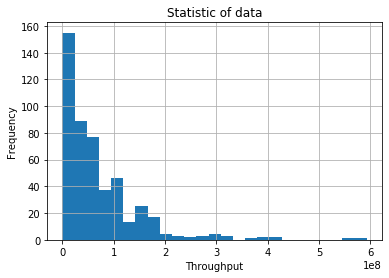

In [11]:
dataframe.hist(column='Throughput', bins=25)
plt.title('Statistic of data')
plt.xlabel('Throughput')
plt.ylabel('Frequency')

### Un-optimised neural network architecture
In this section, a neural architecture is constructed using KERAS API and it is not the best because the hyperparameters are not optimised.

In the **Dense** layers, kernel initializer is used since neural networks need to start of with some weight and update them through backpropagation. The optimizer used in this case is **ADAM** (adaptive learning rate optimization). 

The metrics used to measure the quality of the estimators is mean square error. iI is always non-negative, and values closer to zero are better.

**The rule of thumb for number of hidden layers in neural network architecture is:**
1. 0 hidden layers - Only capable of representing linear separable functions or decisions.
2. 1 hidden layers - Can approximate any function that contains a continuous mapping from one finite space to another.
3. 2 hidden layers - Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.

**The rule of thumb for number of nodes per layer in neural network architecture is:**
1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
3. The number of hidden neurons should be less than twice the size of the input layer.

The following code is an example of multilayer layers neural networks: <br>
<u>**2 hidden layers** </u>:
1. 3-layers mlp (32 -> 16 -> 8 -> 1)
2. 3-layers mlp (32 -> 16 -> 8 -> dropout -> 1)

<u>**1 hidden layers** </u>:
1. 2-layers mlp (32 -> 16 -> 1)
2. 2-layers mlp (32 -> 16 -> dropout -> 1)

<u>**0 hidden layers** </u>:
1. 1-layers mlp (32 -> 1)
2. 1-layers mlp (32 -> dropout -> 1)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define function prototype to create neural network for pipelining later
# 3-layers multiperceptrons
def NN_3_mlp():
    # Create a sequential model
    model = Sequential()

    # Add neurons dense layers (specify the input shape in first dense layer)
    # In these layers, the ReLu activations functions is used
    # Kernel initializer start some weights and update them through backpropagation
    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    return model

# 3-layers multiperceptrons with dropout layers
def NN_3_mlp_dropout():
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    return model

# 2-layers multiperceptrons
def NN_2_mlp():
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    return model

# 2-layers multiperceptrons with dropout layers
def NN_2_mlp_dropout():
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    return model

# Single-layer multiperceptrons
def regressor():
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    return model

Using TensorFlow backend.


### Hyperparameter tuning
In this section, different hyperparameters have been taken into account as shown below:
1. number of layers
2. neurons per layer
3. learning rate
4. batch size
5. number of epochs
6. activation function 
7. optimizer
8. dropout rate

Hyperparameters are parameters that the neural network cannot learn itself via gradient descent or some other variant. Typically it is the best to evaluate the performance of the network on a validation set, and then tweak the hyperparameters and re-evaluate, choosing the values of the hyperparameters that give the best performance on the validation set. 

A common technique used for neural network performance evaluation is K-fold cross validation. It can handle the variance problem of the result set. On the other hand, a random search or grid search is used to select the best parameters for algorithm by re-samping or exhautive search on each combination.

In [7]:
# Import libraries
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [6]:
# 3-layers multiperceptrons
NN_3_mlp()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_1 = KerasRegressor(build_fn=NN_3_mlp, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results_1 = cross_val_score(predictor_1, X_train, Y_train, cv=kfold)
print(results_1)
print("Mean square error: %0.2f (+/- %0.2f)" % (results_1.mean(), results_1.std()))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1056      
______________________________

349/349 [==============================] - 0s 258us/step - loss: 0.5878 - mse: 0.5878
Epoch 39/100
349/349 [==============================] - 0s 230us/step - loss: 0.5943 - mse: 0.5943
Epoch 40/100
349/349 [==============================] - 0s 273us/step - loss: 0.5917 - mse: 0.5917
Epoch 41/100
349/349 [==============================] - 0s 298us/step - loss: 0.5887 - mse: 0.5887
Epoch 42/100
349/349 [==============================] - 0s 284us/step - loss: 0.5867 - mse: 0.5867
Epoch 43/100
349/349 [==============================] - 0s 259us/step - loss: 0.5847 - mse: 0.5847
Epoch 44/100
349/349 [==============================] - 0s 235us/step - loss: 0.5806 - mse: 0.5806
Epoch 45/100
349/349 [==============================] - 0s 252us/step - loss: 0.5758 - mse: 0.5758
Epoch 46/100
349/349 [==============================] - 0s 335us/step - loss: 0.5920 - mse: 0.5920
Epoch 47/100
349/349 [==============================] - 0s 287us/step - loss: 0.5769 - mse: 0.5769
Epoch 48/100
349/349 [=

349/349 [==============================] - 0s 235us/step - loss: 0.5604 - mse: 0.5604
Epoch 94/100
349/349 [==============================] - 0s 244us/step - loss: 0.5620 - mse: 0.5620
Epoch 95/100
349/349 [==============================] - 0s 229us/step - loss: 0.5604 - mse: 0.5604
Epoch 96/100
349/349 [==============================] - 0s 232us/step - loss: 0.5615 - mse: 0.5615
Epoch 97/100
349/349 [==============================] - 0s 235us/step - loss: 0.5592 - mse: 0.5592
Epoch 98/100
349/349 [==============================] - 0s 235us/step - loss: 0.5570 - mse: 0.5570
Epoch 99/100
349/349 [==============================] - 0s 241us/step - loss: 0.5585 - mse: 0.5585
Epoch 100/100
39/39 [==============================] - 0s 410us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                1056      
_______________________________

349/349 [==============================] - 0s 250us/step - loss: 0.5114 - mse: 0.5114
Epoch 40/100
349/349 [==============================] - 0s 249us/step - loss: 0.5094 - mse: 0.5094
Epoch 41/100
349/349 [==============================] - 0s 232us/step - loss: 0.5101 - mse: 0.5101
Epoch 42/100
349/349 [==============================] - 0s 235us/step - loss: 0.5065 - mse: 0.5065
Epoch 43/100
349/349 [==============================] - 0s 244us/step - loss: 0.5125 - mse: 0.5125
Epoch 44/100
349/349 [==============================] - 0s 235us/step - loss: 0.5065 - mse: 0.5065
Epoch 45/100
349/349 [==============================] - 0s 241us/step - loss: 0.5066 - mse: 0.5066
Epoch 46/100
349/349 [==============================] - 0s 241us/step - loss: 0.5042 - mse: 0.5042
Epoch 47/100
349/349 [==============================] - 0s 241us/step - loss: 0.5084 - mse: 0.5084
Epoch 48/100
349/349 [==============================] - 0s 232us/step - loss: 0.5092 - mse: 0.5092
Epoch 49/100
349/349 [=

349/349 [==============================] - 0s 212us/step - loss: 0.6172 - mse: 0.6172
Epoch 95/100
349/349 [==============================] - 0s 238us/step - loss: 0.6181 - mse: 0.6181
Epoch 96/100
349/349 [==============================] - 0s 226us/step - loss: 0.6211 - mse: 0.6211
Epoch 97/100
349/349 [==============================] - 0s 232us/step - loss: 0.6157 - mse: 0.6157
Epoch 98/100
349/349 [==============================] - 0s 226us/step - loss: 0.6136 - mse: 0.6136
Epoch 99/100
349/349 [==============================] - 0s 229us/step - loss: 0.6117 - mse: 0.6117
Epoch 100/100
39/39 [==============================] - 0s 435us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528      

349/349 [==============================] - 0s 232us/step - loss: 0.5717 - mse: 0.5717
Epoch 41/100
349/349 [==============================] - 0s 241us/step - loss: 0.5697 - mse: 0.5697
Epoch 42/100
349/349 [==============================] - 0s 241us/step - loss: 0.5786 - mse: 0.5786
Epoch 43/100
349/349 [==============================] - 0s 235us/step - loss: 0.5758 - mse: 0.5758
Epoch 44/100
349/349 [==============================] - 0s 238us/step - loss: 0.5670 - mse: 0.5670
Epoch 45/100
349/349 [==============================] - 0s 241us/step - loss: 0.5711 - mse: 0.5711
Epoch 46/100
349/349 [==============================] - 0s 238us/step - loss: 0.5642 - mse: 0.5642
Epoch 47/100
349/349 [==============================] - 0s 235us/step - loss: 0.5823 - mse: 0.5823
Epoch 48/100
349/349 [==============================] - 0s 238us/step - loss: 0.5726 - mse: 0.5726
Epoch 49/100
349/349 [==============================] - 0s 235us/step - loss: 0.5778 - mse: 0.5778
Epoch 50/100
349/349 [=

350/350 [==============================] - 0s 246us/step - loss: 0.5264 - mse: 0.5264
Epoch 96/100
350/350 [==============================] - 0s 233us/step - loss: 0.5203 - mse: 0.5203
Epoch 97/100
350/350 [==============================] - 0s 237us/step - loss: 0.5151 - mse: 0.5151
Epoch 98/100
350/350 [==============================] - 0s 234us/step - loss: 0.5094 - mse: 0.5094
Epoch 99/100
350/350 [==============================] - 0s 237us/step - loss: 0.5280 - mse: 0.5280
Epoch 100/100
38/38 [==============================] - 0s 531us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_43 (Dense)             (

In [7]:
# 3-layers multiperceptrons with dropout
NN_3_mlp_dropout()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_2 = KerasRegressor(build_fn=NN_3_mlp_dropout, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results_2 = cross_val_score(predictor_2, X_train, Y_train, cv=kfold)
print(results_2)
print("Mean square error: %0.2f (+/- %0.2f)" % (results_2.mean(), results_2.std()))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                

349/349 [==============================] - 0s 250us/step - loss: 0.7490 - mse: 0.7490
Epoch 36/100
349/349 [==============================] - 0s 244us/step - loss: 0.6892 - mse: 0.6892
Epoch 37/100
349/349 [==============================] - 0s 246us/step - loss: 0.6884 - mse: 0.6884
Epoch 38/100
349/349 [==============================] - 0s 242us/step - loss: 0.7068 - mse: 0.7068
Epoch 39/100
349/349 [==============================] - 0s 245us/step - loss: 0.6985 - mse: 0.6985
Epoch 40/100
349/349 [==============================] - 0s 250us/step - loss: 0.6798 - mse: 0.6798
Epoch 41/100
349/349 [==============================] - 0s 235us/step - loss: 0.6768 - mse: 0.6768
Epoch 42/100
349/349 [==============================] - 0s 244us/step - loss: 0.6967 - mse: 0.6967
Epoch 43/100
349/349 [==============================] - 0s 244us/step - loss: 0.7197 - mse: 0.7197
Epoch 44/100
349/349 [==============================] - 0s 238us/step - loss: 0.6892 - mse: 0.6892
Epoch 45/100
349/349 [=

349/349 [==============================] - 0s 246us/step - loss: 0.6670 - mse: 0.6670
Epoch 90/100
349/349 [==============================] - 0s 236us/step - loss: 0.7268 - mse: 0.7268
Epoch 91/100
349/349 [==============================] - 0s 239us/step - loss: 0.8182 - mse: 0.8182
Epoch 92/100
349/349 [==============================] - 0s 239us/step - loss: 0.6839 - mse: 0.6839
Epoch 93/100
349/349 [==============================] - 0s 237us/step - loss: 0.6919 - mse: 0.6919
Epoch 94/100
349/349 [==============================] - 0s 244us/step - loss: 0.8311 - mse: 0.8311
Epoch 95/100
349/349 [==============================] - 0s 233us/step - loss: 0.7222 - mse: 0.7222
Epoch 96/100
349/349 [==============================] - 0s 233us/step - loss: 0.6733 - mse: 0.6733
Epoch 97/100
349/349 [==============================] - 0s 232us/step - loss: 0.7303 - mse: 0.7303
Epoch 98/100
349/349 [==============================] - 0s 232us/step - loss: 0.8106 - mse: 0.8106
Epoch 99/100
349/349 [=

349/349 [==============================] - 0s 235us/step - loss: 0.6707 - mse: 0.6707
Epoch 33/100
349/349 [==============================] - 0s 241us/step - loss: 0.6889 - mse: 0.6889
Epoch 34/100
349/349 [==============================] - 0s 241us/step - loss: 0.6148 - mse: 0.6148
Epoch 35/100
349/349 [==============================] - 0s 235us/step - loss: 0.6178 - mse: 0.6178
Epoch 36/100
349/349 [==============================] - 0s 243us/step - loss: 0.6718 - mse: 0.6718
Epoch 37/100
349/349 [==============================] - 0s 235us/step - loss: 0.6546 - mse: 0.6546
Epoch 38/100
349/349 [==============================] - 0s 243us/step - loss: 0.6030 - mse: 0.6030
Epoch 39/100
349/349 [==============================] - 0s 239us/step - loss: 0.7429 - mse: 0.7429
Epoch 40/100
349/349 [==============================] - 0s 238us/step - loss: 0.5748 - mse: 0.5748
Epoch 41/100
349/349 [==============================] - 0s 238us/step - loss: 0.6489 - mse: 0.6489
Epoch 42/100
349/349 [=

349/349 [==============================] - 0s 269us/step - loss: 0.9220 - mse: 0.9220
Epoch 5/100
349/349 [==============================] - 0s 284us/step - loss: 0.9134 - mse: 0.9134
Epoch 6/100
349/349 [==============================] - 0s 280us/step - loss: 0.9058 - mse: 0.9058
Epoch 7/100
349/349 [==============================] - 0s 278us/step - loss: 0.8959 - mse: 0.8959
Epoch 8/100
349/349 [==============================] - 0s 264us/step - loss: 0.8454 - mse: 0.8454
Epoch 9/100
349/349 [==============================] - 0s 280us/step - loss: 0.8861 - mse: 0.8861
Epoch 10/100
349/349 [==============================] - 0s 278us/step - loss: 0.8430 - mse: 0.8430
Epoch 11/100
349/349 [==============================] - 0s 276us/step - loss: 0.9056 - mse: 0.9056
Epoch 12/100
349/349 [==============================] - 0s 261us/step - loss: 0.8213 - mse: 0.8213
Epoch 13/100
349/349 [==============================] - 0s 264us/step - loss: 0.8877 - mse: 0.8877
Epoch 14/100
349/349 [======

Epoch 87/100
349/349 [==============================] - 0s 259us/step - loss: 0.6715 - mse: 0.6715 0s - loss: 0.7999 - mse: 0.799
Epoch 88/100
349/349 [==============================] - 0s 255us/step - loss: 0.6222 - mse: 0.6222
Epoch 89/100
349/349 [==============================] - 0s 258us/step - loss: 0.6745 - mse: 0.6745
Epoch 90/100
349/349 [==============================] - 0s 252us/step - loss: 0.6347 - mse: 0.6347
Epoch 91/100
349/349 [==============================] - 0s 263us/step - loss: 0.6913 - mse: 0.6913
Epoch 92/100
349/349 [==============================] - 0s 243us/step - loss: 0.6284 - mse: 0.6284
Epoch 93/100
349/349 [==============================] - 0s 246us/step - loss: 0.6592 - mse: 0.6592
Epoch 94/100
349/349 [==============================] - 0s 252us/step - loss: 0.6680 - mse: 0.6680
Epoch 95/100
349/349 [==============================] - 0s 249us/step - loss: 0.6557 - mse: 0.6557
Epoch 96/100
349/349 [==============================] - 0s 249us/step - loss: 

349/349 [==============================] - 0s 241us/step - loss: 0.7764 - mse: 0.7764
Epoch 31/100
349/349 [==============================] - 0s 241us/step - loss: 0.7566 - mse: 0.7566
Epoch 32/100
349/349 [==============================] - 0s 241us/step - loss: 0.7260 - mse: 0.7260
Epoch 33/100
349/349 [==============================] - 0s 241us/step - loss: 0.7240 - mse: 0.7240
Epoch 34/100
349/349 [==============================] - 0s 237us/step - loss: 0.6871 - mse: 0.6871
Epoch 35/100
349/349 [==============================] - 0s 244us/step - loss: 0.8099 - mse: 0.8099
Epoch 36/100
349/349 [==============================] - 0s 246us/step - loss: 0.6559 - mse: 0.6559
Epoch 37/100
349/349 [==============================] - 0s 238us/step - loss: 0.7020 - mse: 0.7020
Epoch 38/100
349/349 [==============================] - 0s 238us/step - loss: 0.8084 - mse: 0.8084
Epoch 39/100
349/349 [==============================] - 0s 244us/step - loss: 0.7923 - mse: 0.7923
Epoch 40/100
349/349 [=

350/350 [==============================] - 0s 251us/step - loss: 0.9921 - mse: 0.9921
Epoch 3/100
350/350 [==============================] - 0s 286us/step - loss: 0.9787 - mse: 0.9787
Epoch 4/100
350/350 [==============================] - 0s 252us/step - loss: 0.9416 - mse: 0.9416
Epoch 5/100
350/350 [==============================] - 0s 261us/step - loss: 0.9057 - mse: 0.9057
Epoch 6/100
350/350 [==============================] - 0s 263us/step - loss: 0.8671 - mse: 0.8671
Epoch 7/100
350/350 [==============================] - 0s 254us/step - loss: 0.8527 - mse: 0.8527
Epoch 8/100
350/350 [==============================] - 0s 246us/step - loss: 0.8520 - mse: 0.8520
Epoch 9/100
350/350 [==============================] - 0s 252us/step - loss: 0.8736 - mse: 0.8736
Epoch 10/100
350/350 [==============================] - 0s 254us/step - loss: 0.8959 - mse: 0.8959
Epoch 11/100
350/350 [==============================] - 0s 263us/step - loss: 0.8489 - mse: 0.8489
Epoch 12/100
350/350 [========

350/350 [==============================] - 0s 254us/step - loss: 0.7438 - mse: 0.7438
Epoch 57/100
350/350 [==============================] - 0s 246us/step - loss: 0.7227 - mse: 0.7227
Epoch 58/100
350/350 [==============================] - 0s 243us/step - loss: 0.7911 - mse: 0.7911
Epoch 59/100
350/350 [==============================] - 0s 240us/step - loss: 0.6598 - mse: 0.6598
Epoch 60/100
350/350 [==============================] - 0s 234us/step - loss: 0.7156 - mse: 0.7156
Epoch 61/100
350/350 [==============================] - 0s 237us/step - loss: 0.6688 - mse: 0.6688
Epoch 62/100
350/350 [==============================] - 0s 234us/step - loss: 0.6311 - mse: 0.6311
Epoch 63/100
350/350 [==============================] - 0s 237us/step - loss: 0.8099 - mse: 0.8099
Epoch 64/100
350/350 [==============================] - 0s 290us/step - loss: 0.6512 - mse: 0.6512
Epoch 65/100
350/350 [==============================] - 0s 286us/step - loss: 0.6873 - mse: 0.6873
Epoch 66/100
350/350 [=

In [8]:
# 2-layers multiperceptrons
NN_2_mlp()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_3 = KerasRegressor(build_fn=NN_2_mlp, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results_3 = cross_val_score(predictor_3, X_train, Y_train, cv=kfold)
print(results_3)
print("Mean square error: %0.2f (+/- %0.2f)" % (results_3.mean(), results_3.std()))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_90 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_93 (Dense)             (None, 16)                528       
____________________________

349/349 [==============================] - 0s 216us/step - loss: 0.5999 - mse: 0.5999
Epoch 43/100
349/349 [==============================] - 0s 206us/step - loss: 0.5853 - mse: 0.5853
Epoch 44/100
349/349 [==============================] - 0s 209us/step - loss: 0.5841 - mse: 0.5841
Epoch 45/100
349/349 [==============================] - 0s 205us/step - loss: 0.5818 - mse: 0.5818
Epoch 46/100
349/349 [==============================] - 0s 216us/step - loss: 0.5857 - mse: 0.5857
Epoch 47/100
349/349 [==============================] - 0s 215us/step - loss: 0.5835 - mse: 0.5835
Epoch 48/100
349/349 [==============================] - 0s 205us/step - loss: 0.5777 - mse: 0.5777
Epoch 49/100
349/349 [==============================] - 0s 214us/step - loss: 0.5809 - mse: 0.5809
Epoch 50/100
349/349 [==============================] - 0s 213us/step - loss: 0.5778 - mse: 0.5778
Epoch 51/100
349/349 [==============================] - 0s 208us/step - loss: 0.5782 - mse: 0.5782
Epoch 52/100
349/349 [=

349/349 [==============================] - 0s 203us/step - loss: 0.5683 - mse: 0.5683
Epoch 99/100
349/349 [==============================] - 0s 223us/step - loss: 0.5579 - mse: 0.5579
Epoch 100/100
39/39 [==============================] - 0s 461us/step
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_102 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
349/349 [==============================] - 0s 418us/step - loss: 0.8202 - mse: 0.8202
Epoch 2/100
349/349 [========

349/349 [==============================] - 0s 212us/step - loss: 0.5006 - mse: 0.5006
Epoch 47/100
349/349 [==============================] - 0s 212us/step - loss: 0.4965 - mse: 0.4965
Epoch 48/100
349/349 [==============================] - 0s 213us/step - loss: 0.5008 - mse: 0.5008
Epoch 49/100
349/349 [==============================] - 0s 261us/step - loss: 0.5102 - mse: 0.5102
Epoch 50/100
349/349 [==============================] - 0s 213us/step - loss: 0.5012 - mse: 0.5012
Epoch 51/100
349/349 [==============================] - 0s 215us/step - loss: 0.4995 - mse: 0.4995
Epoch 52/100
349/349 [==============================] - 0s 206us/step - loss: 0.5033 - mse: 0.5033
Epoch 53/100
349/349 [==============================] - 0s 200us/step - loss: 0.5013 - mse: 0.5013
Epoch 54/100
349/349 [==============================] - 0s 211us/step - loss: 0.4967 - mse: 0.4967
Epoch 55/100
349/349 [==============================] - 0s 211us/step - loss: 0.5088 - mse: 0.5088
Epoch 56/100
349/349 [=

Epoch 1/100
349/349 [==============================] - 0s 423us/step - loss: 1.0611 - mse: 1.0611
Epoch 2/100
349/349 [==============================] - 0s 226us/step - loss: 1.0302 - mse: 1.0302
Epoch 3/100
349/349 [==============================] - 0s 232us/step - loss: 0.9611 - mse: 0.9611
Epoch 4/100
349/349 [==============================] - 0s 226us/step - loss: 0.9178 - mse: 0.9178
Epoch 5/100
349/349 [==============================] - 0s 238us/step - loss: 0.9107 - mse: 0.9107
Epoch 6/100
349/349 [==============================] - 0s 221us/step - loss: 0.8822 - mse: 0.8822
Epoch 7/100
349/349 [==============================] - 0s 218us/step - loss: 0.8794 - mse: 0.8794
Epoch 8/100
349/349 [==============================] - 0s 221us/step - loss: 0.8527 - mse: 0.8527
Epoch 9/100
349/349 [==============================] - 0s 221us/step - loss: 0.8403 - mse: 0.8403
Epoch 10/100
349/349 [==============================] - 0s 221us/step - loss: 0.8259 - mse: 0.8259
Epoch 11/100
349/34

349/349 [==============================] - 0s 209us/step - loss: 0.5563 - mse: 0.5563
Epoch 58/100
349/349 [==============================] - 0s 221us/step - loss: 0.5544 - mse: 0.5544
Epoch 59/100
349/349 [==============================] - 0s 215us/step - loss: 0.5575 - mse: 0.5575
Epoch 60/100
349/349 [==============================] - 0s 217us/step - loss: 0.5469 - mse: 0.5469
Epoch 61/100
349/349 [==============================] - 0s 211us/step - loss: 0.5526 - mse: 0.5526
Epoch 62/100
349/349 [==============================] - 0s 215us/step - loss: 0.5539 - mse: 0.5539
Epoch 63/100
349/349 [==============================] - 0s 212us/step - loss: 0.5425 - mse: 0.5425
Epoch 64/100
349/349 [==============================] - 0s 210us/step - loss: 0.5454 - mse: 0.5454
Epoch 65/100
349/349 [==============================] - 0s 212us/step - loss: 0.5514 - mse: 0.5514
Epoch 66/100
349/349 [==============================] - 0s 212us/step - loss: 0.5498 - mse: 0.5498
Epoch 67/100
349/349 [=

350/350 [==============================] - 0s 286us/step - loss: 0.8912 - mse: 0.8912
Epoch 6/100
350/350 [==============================] - 0s 231us/step - loss: 0.8888 - mse: 0.8888
Epoch 7/100
350/350 [==============================] - 0s 211us/step - loss: 0.8662 - mse: 0.8662
Epoch 8/100
350/350 [==============================] - 0s 211us/step - loss: 0.8540 - mse: 0.8540
Epoch 9/100
350/350 [==============================] - 0s 220us/step - loss: 0.8490 - mse: 0.8490
Epoch 10/100
350/350 [==============================] - 0s 221us/step - loss: 0.8310 - mse: 0.8310
Epoch 11/100
350/350 [==============================] - 0s 220us/step - loss: 0.8165 - mse: 0.8165
Epoch 12/100
350/350 [==============================] - 0s 214us/step - loss: 0.8086 - mse: 0.8086
Epoch 13/100
350/350 [==============================] - 0s 209us/step - loss: 0.7963 - mse: 0.7963
Epoch 14/100
350/350 [==============================] - 0s 208us/step - loss: 0.7860 - mse: 0.7860
Epoch 15/100
350/350 [=====

In [9]:
# 2-layers multiperceptrons with dropout
NN_2_mlp_dropout()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_4 = KerasRegressor(build_fn=NN_2_mlp_dropout, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results_4 = cross_val_score(predictor_4, X_train, Y_train, cv=kfold)
print(results_4)
print("Mean square error: %0.2f (+/- %0.2f)" % (results_4.mean(), results_4.std()))

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_123 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 32)                1056      
____________________________

349/349 [==============================] - 0s 244us/step - loss: 0.6285 - mse: 0.6285
Epoch 67/100
349/349 [==============================] - 0s 244us/step - loss: 0.7584 - mse: 0.7584
Epoch 68/100
349/349 [==============================] - 0s 238us/step - loss: 0.6585 - mse: 0.6585
Epoch 69/100
349/349 [==============================] - 0s 241us/step - loss: 0.6926 - mse: 0.6926
Epoch 70/100
349/349 [==============================] - 0s 234us/step - loss: 0.7842 - mse: 0.7842
Epoch 71/100
349/349 [==============================] - 0s 250us/step - loss: 0.6183 - mse: 0.6183
Epoch 72/100
349/349 [==============================] - 0s 236us/step - loss: 0.6854 - mse: 0.6854
Epoch 73/100
349/349 [==============================] - 0s 236us/step - loss: 0.6505 - mse: 0.6505
Epoch 74/100
349/349 [==============================] - 0s 233us/step - loss: 0.6827 - mse: 0.6827
Epoch 75/100
349/349 [==============================] - 0s 238us/step - loss: 0.6578 - mse: 0.6578
Epoch 76/100
349/349 [=

349/349 [==============================] - 0s 209us/step - loss: 0.8745 - mse: 0.8745
Epoch 13/100
349/349 [==============================] - 0s 227us/step - loss: 0.8608 - mse: 0.8608
Epoch 14/100
349/349 [==============================] - 0s 222us/step - loss: 0.8543 - mse: 0.8543
Epoch 15/100
349/349 [==============================] - 0s 224us/step - loss: 0.8361 - mse: 0.8361
Epoch 16/100
349/349 [==============================] - 0s 232us/step - loss: 0.8451 - mse: 0.8451
Epoch 17/100
349/349 [==============================] - 0s 229us/step - loss: 0.7995 - mse: 0.7995
Epoch 18/100
349/349 [==============================] - 0s 236us/step - loss: 0.7639 - mse: 0.7639
Epoch 19/100
349/349 [==============================] - 0s 235us/step - loss: 0.7890 - mse: 0.7890
Epoch 20/100
349/349 [==============================] - 0s 237us/step - loss: 0.8238 - mse: 0.8238
Epoch 21/100
349/349 [==============================] - 0s 235us/step - loss: 0.7939 - mse: 0.7939
Epoch 22/100
349/349 [=

349/349 [==============================] - 0s 235us/step - loss: 0.5816 - mse: 0.5816
Epoch 68/100
349/349 [==============================] - 0s 232us/step - loss: 0.5735 - mse: 0.5735
Epoch 69/100
349/349 [==============================] - 0s 227us/step - loss: 0.5549 - mse: 0.5549
Epoch 70/100
349/349 [==============================] - 0s 233us/step - loss: 0.5285 - mse: 0.5285
Epoch 71/100
349/349 [==============================] - 0s 241us/step - loss: 0.5384 - mse: 0.5384
Epoch 72/100
349/349 [==============================] - 0s 278us/step - loss: 0.5606 - mse: 0.5606
Epoch 73/100
349/349 [==============================] - 0s 261us/step - loss: 0.5717 - mse: 0.5717
Epoch 74/100
349/349 [==============================] - 0s 229us/step - loss: 0.5493 - mse: 0.5493
Epoch 75/100
349/349 [==============================] - 0s 229us/step - loss: 0.5593 - mse: 0.5593
Epoch 76/100
349/349 [==============================] - 0s 229us/step - loss: 0.5726 - mse: 0.5726
Epoch 77/100
349/349 [=

349/349 [==============================] - 0s 229us/step - loss: 0.8335 - mse: 0.8335
Epoch 14/100
349/349 [==============================] - 0s 229us/step - loss: 0.8080 - mse: 0.8080
Epoch 15/100
349/349 [==============================] - 0s 218us/step - loss: 0.7473 - mse: 0.7473
Epoch 16/100
349/349 [==============================] - 0s 225us/step - loss: 0.7814 - mse: 0.7814
Epoch 17/100
349/349 [==============================] - 0s 224us/step - loss: 0.8055 - mse: 0.8055
Epoch 18/100
349/349 [==============================] - 0s 234us/step - loss: 0.7473 - mse: 0.7473
Epoch 19/100
349/349 [==============================] - 0s 230us/step - loss: 0.7453 - mse: 0.7453
Epoch 20/100
349/349 [==============================] - 0s 238us/step - loss: 0.7959 - mse: 0.7959
Epoch 21/100
349/349 [==============================] - 0s 231us/step - loss: 0.7049 - mse: 0.7049
Epoch 22/100
349/349 [==============================] - 0s 231us/step - loss: 0.7524 - mse: 0.7524
Epoch 23/100
349/349 [=

349/349 [==============================] - 0s 244us/step - loss: 0.6650 - mse: 0.6650
Epoch 69/100
349/349 [==============================] - 0s 236us/step - loss: 0.6351 - mse: 0.6351
Epoch 70/100
349/349 [==============================] - 0s 232us/step - loss: 0.6623 - mse: 0.6623
Epoch 71/100
349/349 [==============================] - 0s 231us/step - loss: 0.6155 - mse: 0.6155
Epoch 72/100
349/349 [==============================] - 0s 233us/step - loss: 0.6396 - mse: 0.6396
Epoch 73/100
349/349 [==============================] - 0s 229us/step - loss: 0.6923 - mse: 0.6923
Epoch 74/100
349/349 [==============================] - 0s 235us/step - loss: 0.6787 - mse: 0.6787
Epoch 75/100
349/349 [==============================] - 0s 229us/step - loss: 0.7424 - mse: 0.7424
Epoch 76/100
349/349 [==============================] - 0s 233us/step - loss: 0.6408 - mse: 0.6408
Epoch 77/100
349/349 [==============================] - 0s 233us/step - loss: 0.6163 - mse: 0.6163
Epoch 78/100
349/349 [=

350/350 [==============================] - 0s 237us/step - loss: 0.7907 - mse: 0.7907
Epoch 15/100
350/350 [==============================] - 0s 246us/step - loss: 0.8047 - mse: 0.8047
Epoch 16/100
350/350 [==============================] - 0s 227us/step - loss: 0.7550 - mse: 0.7550
Epoch 17/100
350/350 [==============================] - 0s 229us/step - loss: 0.7492 - mse: 0.7492
Epoch 18/100
350/350 [==============================] - 0s 229us/step - loss: 0.7607 - mse: 0.7607
Epoch 19/100
350/350 [==============================] - 0s 232us/step - loss: 0.7176 - mse: 0.7176
Epoch 20/100
350/350 [==============================] - 0s 226us/step - loss: 0.7386 - mse: 0.7386
Epoch 21/100
350/350 [==============================] - 0s 222us/step - loss: 0.7340 - mse: 0.7340
Epoch 22/100
350/350 [==============================] - 0s 227us/step - loss: 0.7194 - mse: 0.7194
Epoch 23/100
350/350 [==============================] - 0s 229us/step - loss: 0.6629 - mse: 0.6629
Epoch 24/100
350/350 [=

350/350 [==============================] - 0s 237us/step - loss: 0.5680 - mse: 0.5680
Epoch 70/100
350/350 [==============================] - 0s 242us/step - loss: 0.6583 - mse: 0.6583
Epoch 71/100
350/350 [==============================] - 0s 235us/step - loss: 0.5785 - mse: 0.5785
Epoch 72/100
350/350 [==============================] - 0s 227us/step - loss: 0.6188 - mse: 0.6188
Epoch 73/100
350/350 [==============================] - 0s 226us/step - loss: 0.6559 - mse: 0.6559
Epoch 74/100
350/350 [==============================] - 0s 243us/step - loss: 0.5986 - mse: 0.5986
Epoch 75/100
350/350 [==============================] - 0s 234us/step - loss: 0.5687 - mse: 0.5687
Epoch 76/100
350/350 [==============================] - 0s 231us/step - loss: 0.5941 - mse: 0.5941
Epoch 77/100
350/350 [==============================] - 0s 234us/step - loss: 0.5989 - mse: 0.5989
Epoch 78/100
350/350 [==============================] - 0s 234us/step - loss: 0.5973 - mse: 0.5973
Epoch 79/100
350/350 [=

In [10]:
# Single-layer multiperceptrons
regressor()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_5 = KerasRegressor(build_fn=regressor, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results_5 = cross_val_score(predictor_5, X_train, Y_train, cv=kfold)
print(results_5)
print("Mean square error: %0.2f (+/- %0.2f)" % (results_5.mean(), results_5.std()))

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 33        
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 33        
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
349/349 [=====

349/349 [==============================] - 0s 206us/step - loss: 0.6331 - mse: 0.6331
Epoch 48/100
349/349 [==============================] - 0s 218us/step - loss: 0.6220 - mse: 0.6220
Epoch 49/100
349/349 [==============================] - 0s 200us/step - loss: 0.6244 - mse: 0.6244
Epoch 50/100
349/349 [==============================] - 0s 199us/step - loss: 0.6269 - mse: 0.6269
Epoch 51/100
349/349 [==============================] - 0s 201us/step - loss: 0.6201 - mse: 0.6201
Epoch 52/100
349/349 [==============================] - 0s 198us/step - loss: 0.6123 - mse: 0.6123
Epoch 53/100
349/349 [==============================] - 0s 208us/step - loss: 0.6136 - mse: 0.6136
Epoch 54/100
349/349 [==============================] - 0s 198us/step - loss: 0.6004 - mse: 0.6004
Epoch 55/100
349/349 [==============================] - 0s 201us/step - loss: 0.6080 - mse: 0.6080
Epoch 56/100
349/349 [==============================] - 0s 202us/step - loss: 0.6073 - mse: 0.6073
Epoch 57/100
349/349 [=

Epoch 1/100
349/349 [==============================] - 0s 368us/step - loss: 0.8090 - mse: 0.8090
Epoch 2/100
349/349 [==============================] - 0s 221us/step - loss: 0.7638 - mse: 0.7638
Epoch 3/100
349/349 [==============================] - 0s 219us/step - loss: 0.7340 - mse: 0.7340
Epoch 4/100
349/349 [==============================] - 0s 214us/step - loss: 0.7235 - mse: 0.7235
Epoch 5/100
349/349 [==============================] - 0s 215us/step - loss: 0.7070 - mse: 0.7070
Epoch 6/100
349/349 [==============================] - 0s 212us/step - loss: 0.6927 - mse: 0.6927
Epoch 7/100
349/349 [==============================] - 0s 212us/step - loss: 0.6925 - mse: 0.6925
Epoch 8/100
349/349 [==============================] - 0s 218us/step - loss: 0.6805 - mse: 0.6805
Epoch 9/100
349/349 [==============================] - 0s 217us/step - loss: 0.6747 - mse: 0.6747
Epoch 10/100
349/349 [==============================] - 0s 209us/step - loss: 0.6870 - mse: 0.6870
Epoch 11/100
349/34

349/349 [==============================] - 0s 195us/step - loss: 0.5346 - mse: 0.5346
Epoch 60/100
349/349 [==============================] - 0s 201us/step - loss: 0.5235 - mse: 0.5235
Epoch 61/100
349/349 [==============================] - 0s 194us/step - loss: 0.5277 - mse: 0.5277
Epoch 62/100
349/349 [==============================] - 0s 202us/step - loss: 0.5209 - mse: 0.5209
Epoch 63/100
349/349 [==============================] - 0s 191us/step - loss: 0.5330 - mse: 0.5330
Epoch 64/100
349/349 [==============================] - 0s 196us/step - loss: 0.5229 - mse: 0.5229
Epoch 65/100
349/349 [==============================] - 0s 188us/step - loss: 0.5279 - mse: 0.5279
Epoch 66/100
349/349 [==============================] - 0s 194us/step - loss: 0.5149 - mse: 0.5149
Epoch 67/100
349/349 [==============================] - 0s 191us/step - loss: 0.5257 - mse: 0.5257
Epoch 68/100
349/349 [==============================] - 0s 201us/step - loss: 0.5130 - mse: 0.5130
Epoch 69/100
349/349 [=

349/349 [==============================] - 0s 198us/step - loss: 0.8116 - mse: 0.8116
Epoch 12/100
349/349 [==============================] - 0s 216us/step - loss: 0.7974 - mse: 0.7974
Epoch 13/100
349/349 [==============================] - 0s 198us/step - loss: 0.7773 - mse: 0.7773
Epoch 14/100
349/349 [==============================] - 0s 204us/step - loss: 0.7657 - mse: 0.7657
Epoch 15/100
349/349 [==============================] - 0s 199us/step - loss: 0.7562 - mse: 0.7562
Epoch 16/100
349/349 [==============================] - 0s 196us/step - loss: 0.7427 - mse: 0.7427
Epoch 17/100
349/349 [==============================] - 0s 202us/step - loss: 0.7418 - mse: 0.7418
Epoch 18/100
349/349 [==============================] - 0s 200us/step - loss: 0.7213 - mse: 0.7213
Epoch 19/100
349/349 [==============================] - 0s 201us/step - loss: 0.7237 - mse: 0.7237
Epoch 20/100
349/349 [==============================] - 0s 198us/step - loss: 0.7168 - mse: 0.7168
Epoch 21/100
349/349 [=

349/349 [==============================] - 0s 206us/step - loss: 0.5745 - mse: 0.5745
Epoch 70/100
349/349 [==============================] - 0s 212us/step - loss: 0.5539 - mse: 0.5539
Epoch 71/100
349/349 [==============================] - 0s 207us/step - loss: 0.5604 - mse: 0.5604
Epoch 72/100
349/349 [==============================] - 0s 198us/step - loss: 0.5630 - mse: 0.5630
Epoch 73/100
349/349 [==============================] - 0s 212us/step - loss: 0.5625 - mse: 0.5625
Epoch 74/100
349/349 [==============================] - 0s 205us/step - loss: 0.5645 - mse: 0.5645
Epoch 75/100
349/349 [==============================] - 0s 194us/step - loss: 0.5631 - mse: 0.5631
Epoch 76/100
349/349 [==============================] - 0s 205us/step - loss: 0.5585 - mse: 0.5585
Epoch 77/100
349/349 [==============================] - 0s 244us/step - loss: 0.5624 - mse: 0.5624
Epoch 78/100
349/349 [==============================] - 0s 249us/step - loss: 0.5586 - mse: 0.5586
Epoch 79/100
349/349 [=

350/350 [==============================] - 0s 198us/step - loss: 0.7102 - mse: 0.7102
Epoch 22/100
350/350 [==============================] - 0s 215us/step - loss: 0.7068 - mse: 0.7068
Epoch 23/100
350/350 [==============================] - 0s 203us/step - loss: 0.6890 - mse: 0.6890
Epoch 24/100
350/350 [==============================] - 0s 206us/step - loss: 0.6984 - mse: 0.6984
Epoch 25/100
350/350 [==============================] - 0s 203us/step - loss: 0.6826 - mse: 0.6826
Epoch 26/100
350/350 [==============================] - 0s 203us/step - loss: 0.6717 - mse: 0.6717
Epoch 27/100
350/350 [==============================] - 0s 214us/step - loss: 0.6701 - mse: 0.6701
Epoch 28/100
350/350 [==============================] - 0s 206us/step - loss: 0.6576 - mse: 0.6576
Epoch 29/100
350/350 [==============================] - 0s 211us/step - loss: 0.6618 - mse: 0.6618
Epoch 30/100
350/350 [==============================] - 0s 209us/step - loss: 0.6594 - mse: 0.6594
Epoch 31/100
350/350 [=

### Plotting learning curve 
A learning curve is a plot of model learning performance over experience or time. It is a diagnostic tool commonly used in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves. Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or good-fit model.

In [11]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_178 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_179 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_180 (Dense)            (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 32)                1056      
____________________________

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

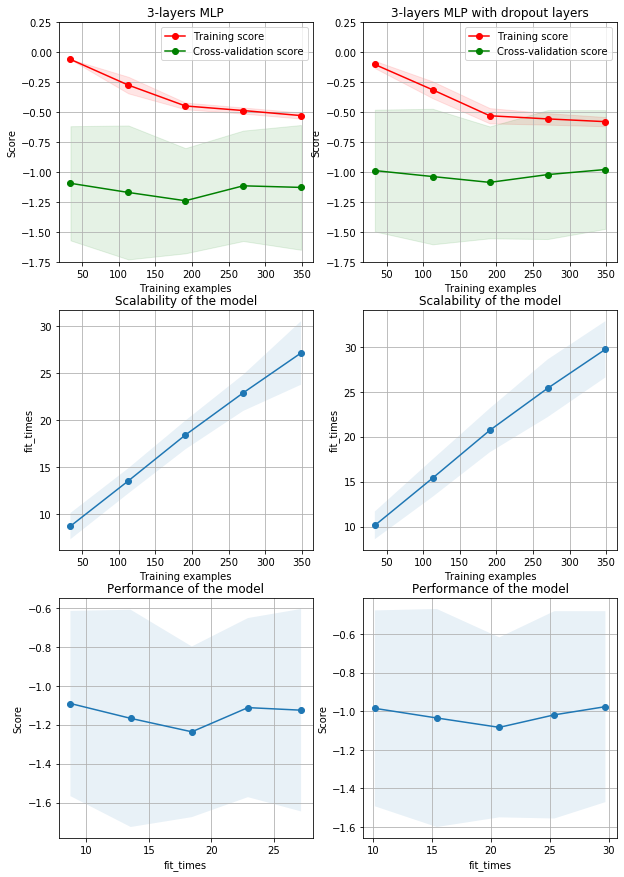

In [12]:
# Plotting learning curves
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# 3-layers multiperceptrons
NN_3_mlp()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_1 = KerasRegressor(build_fn=NN_3_mlp, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
title = "3-layers MLP"
plot_learning_curve(predictor_1, title, X_train, Y_train, axes=axes[:, 0], ylim=(-1.75, 0.25),
                    cv=kfold, n_jobs=-1)

# 3-layers multiperceptrons with dropout layers
NN_3_mlp_dropout()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_2 = KerasRegressor(build_fn=NN_3_mlp_dropout, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
title = "3-layers MLP with dropout layers"
plot_learning_curve(predictor_2, title, X_train, Y_train, axes=axes[:, 1], ylim=(-1.75, 0.25),
                    cv=kfold, n_jobs=-1)

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_185 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_186 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_189 (Dense)            (None, 16)                528       
____________________________

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

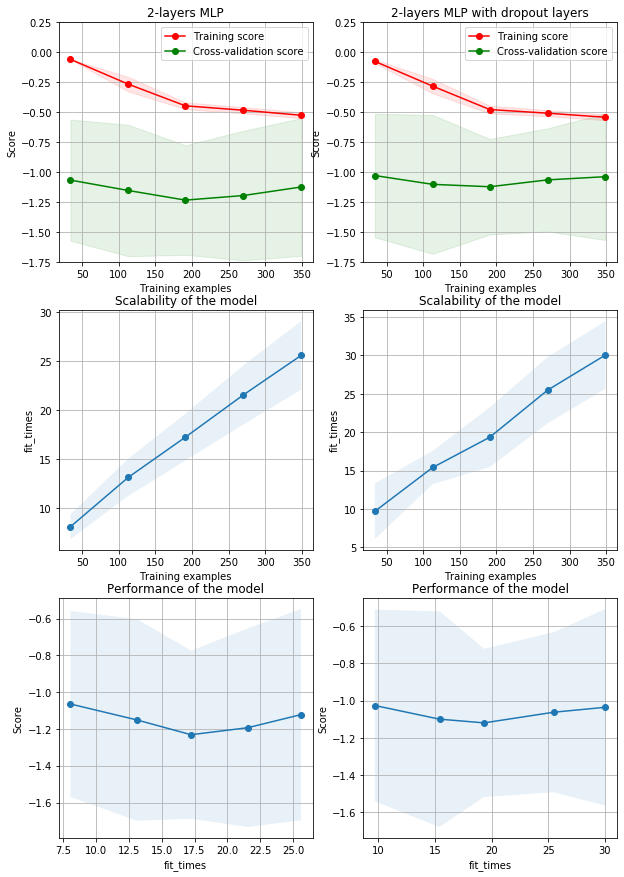

In [13]:
# Plotting learning curves
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# 2-layers multiperceptrons
NN_2_mlp()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_3 = KerasRegressor(build_fn=NN_2_mlp, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
title = "2-layers MLP"
plot_learning_curve(predictor_3, title, X_train, Y_train, axes=axes[:, 0], ylim=(-1.75, 0.25),
                    cv=kfold, n_jobs=-1)

# 2-layers multiperceptrons with dropout layers
NN_2_mlp_dropout()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_4 = KerasRegressor(build_fn=NN_2_mlp_dropout, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
title = "2-layers MLP with dropout layers"
plot_learning_curve(predictor_4, title, X_train, Y_train, axes=axes[:, 1], ylim=(-1.75, 0.25),
                    cv=kfold, n_jobs=-1)

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 33        
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

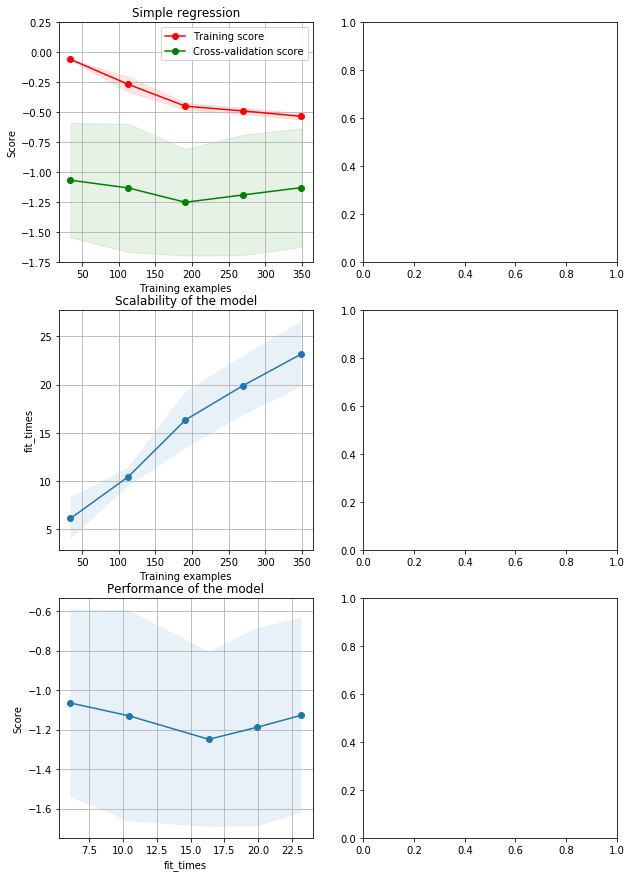

In [14]:
# Plotting learning curves
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Single layer multiperceptrons (simple regression)
regressor()

# Create an instance using wrappers and pass it both the name of the function to create the neural network model
predictor_5 = KerasRegressor(build_fn=regressor, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
title = "Simple regression"
plot_learning_curve(predictor_5, title, X_train, Y_train, axes=axes[:, 0], ylim=(-1.75, 0.25),
                    cv=kfold, n_jobs=-1)

### Grid Search optimization
Grid search allowed us to choose the best hyperparameter used for neural network architecture by looking at multiple parameter changes that affect the estimators. **Note that grid search cross validation is computationally expensive as each combination is evaluated using the k-fold cross-validation**. The 3-layers multilayer perceptrons with dropout is choosen. The batch size and epoch are fixed 5 and 100 respectively and the hyperparameter to be optimized are number of neurons per layer, activation function, optimizer and weight initializer.

In [19]:
from sklearn.model_selection import GridSearchCV

# Tune the different optimizer, weight initializer, neurons activation
def NN_3_mlp_dropout(hidden_1=16, hidden_2=8, activation='relu', optimizer='SGD', init_mode='he_normal'):
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(hidden_1, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(hidden_2, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer=init_mode))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
    return model

In [20]:
import numbers

def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

### Determine the complete architecture of the neural network
Find the number of neurons per hidden layers before optimizing other hyperparameters.

In [21]:
# Define different number of neurons per layers as grid search parameters
hidden_1 = [8, 16, 32, 64, 96, 128]
hidden_2 = [8, 16, 32, 64, 96, 128]
param_grid = dict(hidden_1=hidden_1, hidden_2=hidden_2)
model_CV = KerasRegressor(build_fn=NN_3_mlp_dropout, epochs=100, batch_size=5, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, return_train_score=True)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 618us/step - loss: 1.1826 - mse: 1.1826
Epoch 2/100
388/388 

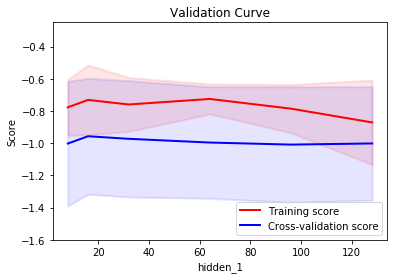

In [24]:
# PLot the validation curve of first hidden layer
plot_grid_search_validation_curve(grid, 'hidden_1', ylim=(-1.6, -0.25))

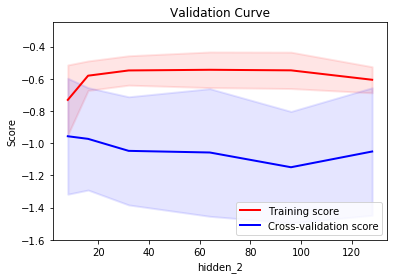

In [25]:
# PLot the validation curve of second hidden layer
plot_grid_search_validation_curve(grid, 'hidden_2', ylim=(-1.6, -0.25))

In [15]:
# Define different optimizer as grid search parameters
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizers)
model_CV = KerasRegressor(build_fn=NN_3_mlp_dropout, epochs=100, batch_size=5, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} with {param}')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 517us/step - loss: 1.0011 - mse: 1.0011
Epoch 2/100
388/388 

In [26]:
# Define different activation function as grid search parameters
activation = ['relu', 'linear']
param_grid = dict(activation=activation)
model_CV = KerasRegressor(build_fn=NN_3_mlp_dropout, epochs=100, batch_size=5, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} with {param}')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 681us/step - loss: 1.1001 - mse: 1.1001
Epoch 2/100
388/388 

In [27]:
# Define different weight initializer as grid search parameters
init_mode = ['he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
model_CV = KerasRegressor(build_fn=NN_3_mlp_dropout, epochs=100, batch_size=5, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 543us/step - loss: 1.2273 - mse: 1.2273
Epoch 2/100
388/388 

### Plot grid search result 
This section is mainly discuss the hyperparameter such as number of epochs, batch size and learning rate on the performances of the networks. After finding the best network architecure and optimizer, the next step is to configure the best batch size, epoch and learning rate to feed into the neural networks. 

The adaptive gradient algorithm is an iterative learning algorithm that find a set of internal model parameters that minimize the error gradient. The batch size is one of the hyperparameter that controls the number of training samples to work through before updating the internal parameters. The other hyperparameter is the number of epochs that controls the number of complete passes throught the training data set. A single epoch may consists of one or multiple batches. The learning rate determine the speed of the algorithm that can converged to the local or global minima in the non-linear manifold.

In [28]:
from keras.optimizers import Adagrad

# Define neural network model with best optimizer, weight initializer and neural activations
# Tune the learning rate of the optimizer.
def NN_optimized(learn_rate=0.01):
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    optimizer = Adagrad(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
    return model

In [29]:
# Define different batch size and epochs as grid search parameters
batch_size = [5, 10, 20, 40, 60, 80, 100]
epochs = [10, 100, 500, 1000]
param_grid = dict(batch_size=batch_size, epochs=epochs)
model_CV = KerasRegressor(build_fn=NN_optimized, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, return_train_score=True)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 457us/step - loss: 2.7277 - mse: 2.7277
Epoch 2/100
388/388 

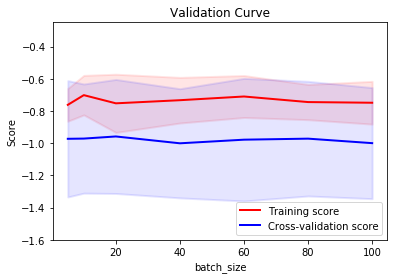

In [31]:
# PLot the validation curve of batch sizes
plot_grid_search_validation_curve(grid, 'batch_size', ylim=(-1.6, -0.25))

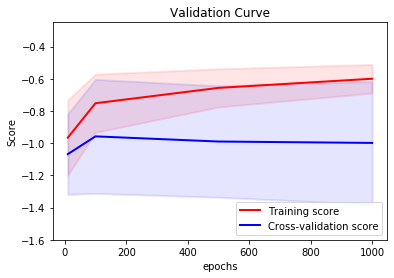

In [32]:
# PLot the validation curve of number of epochs
plot_grid_search_validation_curve(grid, 'epochs', ylim=(-1.6, -0.25))

In [34]:
# Define different learning rate of optimizer as grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)
model_CV = KerasRegressor(build_fn=NN_optimized, batch_size=20, epochs=100, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, return_train_score=True)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 384us/step - loss: 7.6657 - mse: 7.6657
Epoch 2/100
388/388 

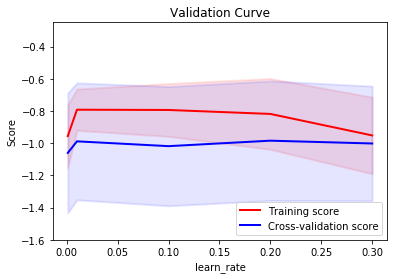

In [35]:
# PLot the validation curve of learning rates 
plot_grid_search_validation_curve(grid, 'learn_rate', ylim=(-1.6, -0.25))

### Regularization
A network with large weights are very likely to learn the statistical noise in the training data set. This will possible sign of overfitting model that very sensitive to the changes of input features. This overfit model will result in poor performance when making prediction of new unseen data. 

There are two ways of reducing the overfitting of neural netowrk model on training data using weight regularizer and varying dropout rate. The popular weight regularizer used mostly are L1 and L2 norm. These regularizeer set a constraint in the network to force small weights. The L1 norm take the absolute difference of weights and it does feature selection. The The L2 norm take the square difference of the weights. In this section, we are going to use L2 norm regularizer.

The dropout regularization also reduce overfitting in the networks by randomly dropout nodes in the layer during training pahse. As a result, this had enabled network to learn a sparse representation of the input features.

In [38]:
from keras.regularizers import l2

# Tune the regularizer hyperparamters
def NN_regularized(dropout_rate=0.01, weight_lambda=0.001):
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(weight_lambda)))
    model.add(Dense(16, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(weight_lambda)))
    model.add(Dense(8, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(weight_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='he_normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    optimizer = Adagrad(lr=0.2)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
    return model

In [39]:
# Define different dropout rate and l2 regularizer lambda as grid search parameters
dropout_rate = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
weight_lambda = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
param_grid = dict(dropout_rate=dropout_rate, weight_lambda=weight_lambda)
model_CV = KerasRegressor(build_fn=NN_regularized, batch_size=20, epochs=100, verbose=1)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, return_train_score=True)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print(f'Best scores for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 0s 489us/step - loss: 2.5040 - mse: 2.5023
Epoch 2/100
388/388

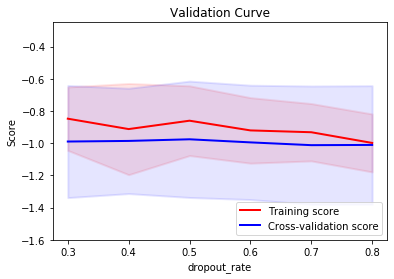

In [40]:
# PLot the validation curve of dropout rate 
plot_grid_search_validation_curve(grid, 'dropout_rate', ylim=(-1.6, -0.25))

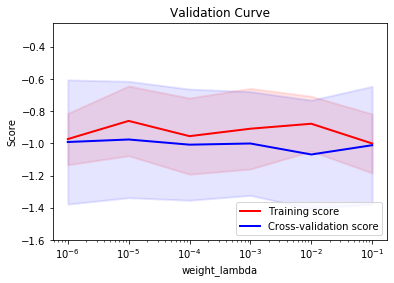

In [42]:
# PLot the validation curve of regularizer 
plot_grid_search_validation_curve(grid, 'weight_lambda', log=True, ylim=(-1.6, -0.25))

### Model evaluation on test dataset
After tuning all the hyperparameter, the neural network model is finalized with optimized parameter found using grid search. The finalized model is first used to train the dataset and evaluate the validation set. Then, it is used to evaluate the performances of estimator on the test dataset. The metrics used to measure the performances of the model are mean square error loss versus epochs and scatter plot of predicted throughput versus measured throughput

In [69]:
# Finalized neural network model
def NN_finalized():
    # Create a sequential model
    model = Sequential()

    model.add(Dense(32, input_dim=32, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(1e-05)))
    model.add(Dense(16, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(1e-05)))
    model.add(Dense(8, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(1e-05)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='he_normal'))

    # Display summary of the model
    model.summary()

    # Compile the model using ADAM (Adaptive learning rate optimization)
    optimizer = Adagrad(lr=0.2)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    
    return model

In [70]:
# Fit the training dataset to finalized model
model = NN_finalized()
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=100, batch_size=20, verbose=1)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_16 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 9         
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________
Train on 259 samples, validate on 129 samples
Epoch 1/100
259/259 [==============================] - 0s 1ms/step - lo

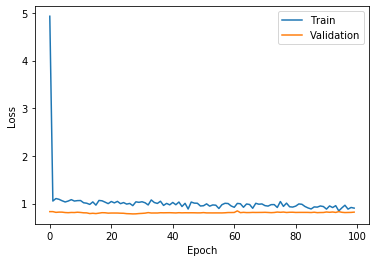

In [55]:
# Plot loss score versus epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [71]:
# Evaluate test data set
results = model.evaluate(X_test, Y_test, batch_size=20)
print('Test loss: (%f), Output mean square error: (%f)' % (results[0], results[1]))

97/97 [==============================] - 0s 122us/step
Test loss: (1.132572), Output mean square error: (1.130940)


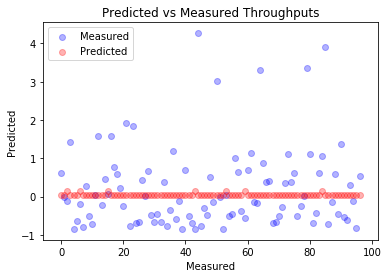

In [112]:
# Make a prediction 
y_pred = model.predict(X_test)

_, ax = plt.subplots()

ax.scatter(x=range(0, Y_test.size), y=Y_test, c='blue', label='Measured', alpha=0.3)
ax.scatter(x=range(0, y_pred.size), y=y_pred, c='red', label='Predicted', alpha=0.3)

plt.title('Predicted vs Measured Throughputs')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

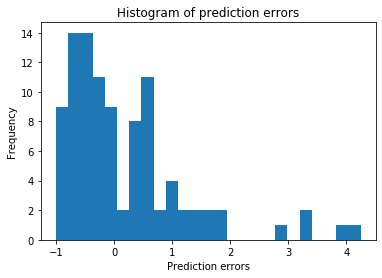

In [113]:
error =  Y_test - y_pred
plt.hist(error, bins=25)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction errors')
plt.ylabel('Frequency')